### Library to add

In [1]:
import pandas as pd
import numpy as np
import datetime
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

## Data Import

In [2]:
#input Train File
df_org = pd.read_csv('ecommerce_train.csv')

#Input Text File
test_org = pd.read_csv('ecommerce_test.csv')

#Get Numeric Data Columns and populate list from dataframe
numeric_col_list=df_org.select_dtypes(include=np.number).columns.tolist()
numeric_col_list.remove('revenue')
numeric_col_list.remove('session_id')
print (numeric_col_list)


#Get String  Data Columns and populate list from dataframe
string_col_list =df_org.select_dtypes(include=object).columns.tolist()
print (string_col_list)
 


#Get Date Columns and  list from dataframe
date_col_list=df_org.select_dtypes(include=np.datetime64).columns.tolist()
print (date_col_list)




['administrative', 'administrative_duration', 'informational', 'informational_duration', 'productrelated', 'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues', 'specialday', 'region']
['month', 'operatingsystems', 'browser', 'traffictype', 'visitortype']
[]


#### Observation:
There were * values in 'operatingsystems', 'browser' and 'traffictype'.
As * is a unknown value so we are doing * value Treatement in Train and Test Data, by replacing it with appropriate value.

In [4]:
## * value treatement on train set

a=df_org.sort_values('browser',ascending=True).groupby('browser')['revenue'].agg(mean= 'mean',sum='count')
print(a)
b=df_org.sort_values('operatingsystems',ascending=True).groupby('operatingsystems')['revenue'].agg(mean= 'mean',sum='count')
print(b)
c=df_org.sort_values('traffictype',ascending=True).groupby('traffictype')['revenue'].agg(mean= 'mean',sum='count')
print(c)

df_org['browser']=df_org['browser'].replace({'*':'3'})
df_org['operatingsystems']=df_org['operatingsystems'].replace({'*':'3'})
df_org['traffictype']=df_org['traffictype'].replace({'*':'3'})


             mean    sum
browser                 
*        0.100000     50
1        0.154956   7557
10       0.230496    564
13       0.186869    198
2        0.155717  25540
3        0.094660    412
4        0.192957   2783
5        0.161927   1723
6        0.121753    616
7        0.133333    165
8        0.150510    392
                      mean    sum
operatingsystems                 
*                 0.094118     85
1                 0.154121   8104
2                 0.173999  21638
3                 0.114706   8439
4                 0.202270   1498
8                 0.161017    236
                 mean    sum
traffictype                 
*            0.091667    120
1            0.123720   7323
10           0.192715   1510
11           0.111264    728
13           0.070629   2860
15           0.020408    147
2            0.218493  12545
20           0.230906    563
3            0.096994   6753
4            0.159580   3622
5            0.199085    874
6            0.125601   14

In [5]:
## * value treatement on Test set

test_org['browser']=test_org['browser'].replace({'*':'3'})
test_org['operatingsystems']=test_org['operatingsystems'].replace({'*':'3'})
test_org['traffictype']=test_org['traffictype'].replace({'*':'3'})


### Checking Missing values for both Train and Test Data

In [6]:
#checking Missing Values on Train Data
print("\n Idenitfy percentage of missing values for each column in given datasets")
print(df_org.isna().sum() / df_org.shape[0] * 100)

#checking Missing Values on Test Data
print("\n Idenitfy percentage of missing values for each column in given datasets")
print(df_org.isna().sum() / df_org.shape[0] * 100)


 Idenitfy percentage of missing values for each column in given datasets
session_id                 0.0
administrative             0.0
administrative_duration    0.0
informational              0.0
informational_duration     0.0
productrelated             0.0
productrelated_duration    0.0
bouncerates                0.0
exitrates                  0.0
pagevalues                 0.0
specialday                 0.0
month                      0.0
operatingsystems           0.0
browser                    0.0
region                     0.0
traffictype                0.0
visitortype                0.0
weekend                    0.0
revenue                    0.0
dtype: float64

 Idenitfy percentage of missing values for each column in given datasets
session_id                 0.0
administrative             0.0
administrative_duration    0.0
informational              0.0
informational_duration     0.0
productrelated             0.0
productrelated_duration    0.0
bouncerates                0.0


#### Observation from Missing Value Detection 

By looking the above code snippet we can see that there are no missing values for both Train as well as Test dataset.
Hence, no Missing Value Treatement is necessary.

In [7]:
df_v1=df_org.copy()
df_v1.drop('session_id',axis=1,inplace=True)

test_v1=test_org.copy()
test_v1.drop('session_id',axis=1,inplace=True)

#### Boxplot

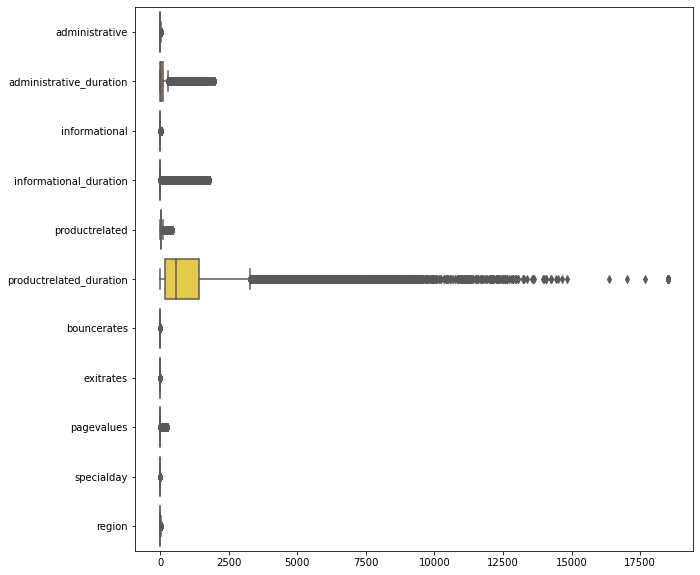

In [8]:
def boxplots(data,col_list):
    #col_list.remove('customer_id')
    #col_list.remove('Y')
    fig = plt.figure(figsize=(10,10))
    sns.boxplot(data=data[col_list], orient="h", palette="Set2")
    #df.boxplot(column = col_list,orient='horizontal')

boxplots(df_v1,numeric_col_list)

In [9]:
df_v2=df_v1.copy()

In [10]:
df_v2['revenue'].value_counts()

0    33669
1     6331
Name: revenue, dtype: int64

#### BI Variate and IV

Information value of administrative is 0.185535
Information value of administrative_duration is 0.224423
Information value of informational is 0.072887
Information value of informational_duration is 0.083944
Information value of productrelated is 0.417846
Information value of productrelated_duration is 0.482456
Information value of bouncerates is 0.418622
Information value of exitrates is 0.656889
Information value of pagevalues is 2.201099
Information value of specialday is 0.07638
Information value of month is 0.216028
Information value of operatingsystems is 0.03737
Information value of browser is 0.013157
Information value of region is 0.009375
Information value of traffictype is 0.198446
Information value of visitortype is 0.076991
Information value of weekend is 0.002992
                  Variable        IV
0           administrative  0.185535
0  administrative_duration  0.224423
0            informational  0.072887
0   informational_duration  0.083944
0           productrelated 

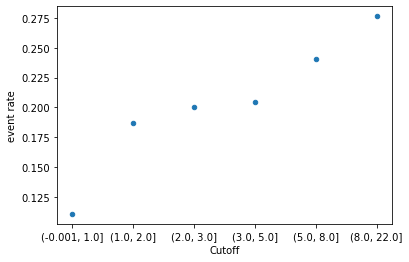

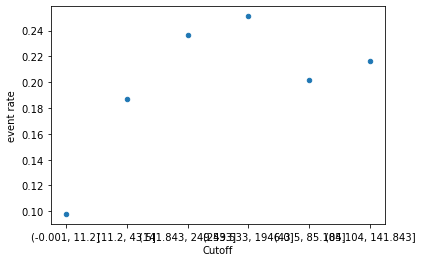

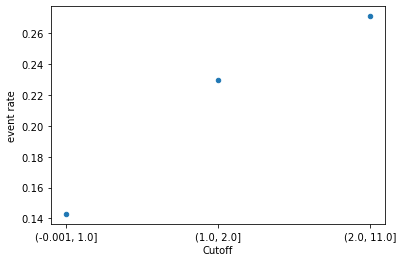

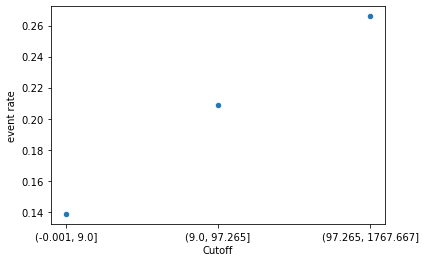

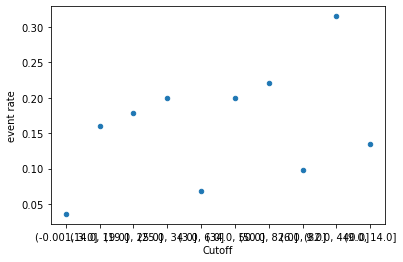

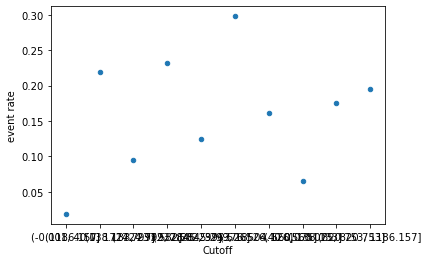

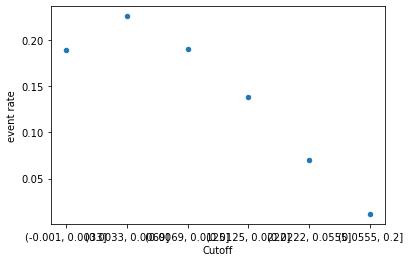

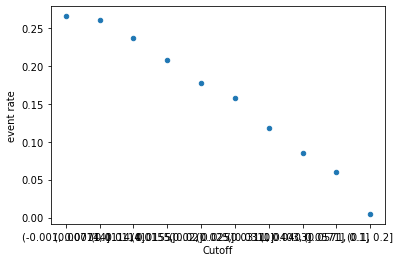

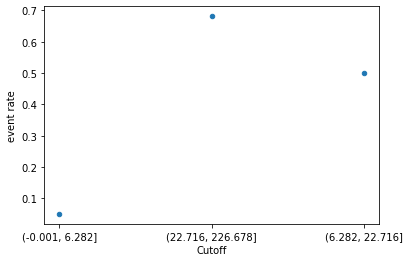

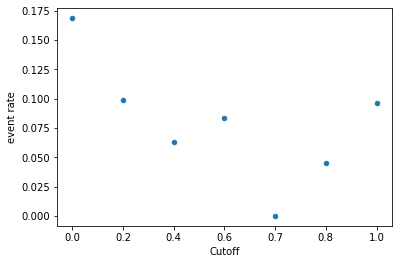

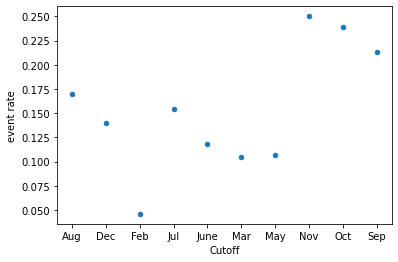

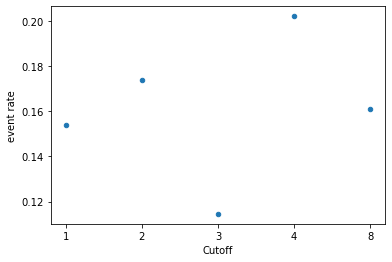

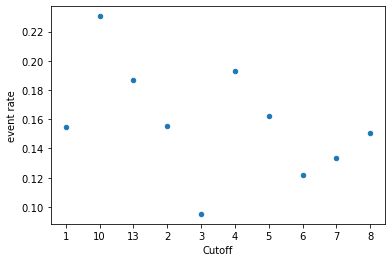

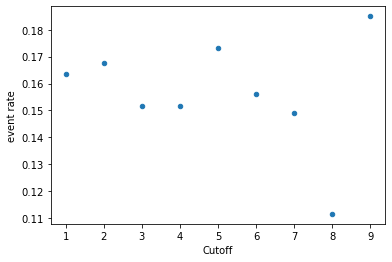

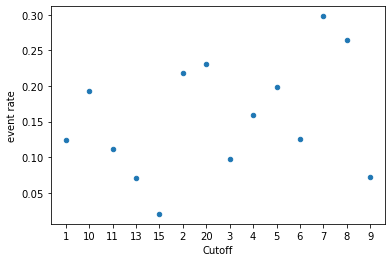

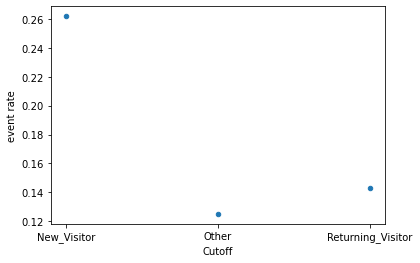

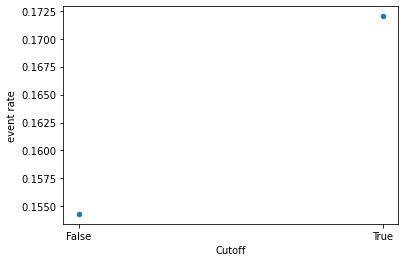

In [11]:
##Bivariate and IV

def iv_woe(data, target, bins=10, show_woe=False):
   
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
   
    #Extract Column Names
    cols = data.columns
   
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['event rate'] = d['Events'] / d['N']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        #if show_woe == True:
        #    print(d)
        d.plot.scatter(x='Cutoff', y='event rate')
    return newDF, woeDF


iv, woe = iv_woe(data = df_v2, target = 'revenue', bins=10, show_woe = True)
print(iv)
#print(woe)
woe.to_csv(r'output_before_data.csv', index=False)

#### One Hot Encoding for visitortype ,weekend  and month

In [12]:
###one hot encoding 
#df_v2= df_v1.copy()

for i in ["visitortype","weekend","month"]:
    print("Dummy encoding is done for: ", i)
    df_v2=pd.get_dummies(df_v2, columns=[i], drop_first=True)

print(df_v2)

for i in ["visitortype","weekend","month"]:
    print("Dummy encoding is done for: ", i)
    test_v1=pd.get_dummies(test_v1, columns=[i], drop_first=True)

print(test_v1)


Dummy encoding is done for:  visitortype
Dummy encoding is done for:  weekend
Dummy encoding is done for:  month
       administrative  administrative_duration  informational  \
0                   2                47.500000              0   
1                   0                 0.000000              0   
2                   7               206.500000              1   
3                   1                18.258571              0   
4                   0                 0.000000              0   
...               ...                      ...            ...   
39995              14               271.232434              1   
39996              14               123.930000              5   
39997               0                 0.000000              0   
39998               0                 0.000000              0   
39999               1                 0.000000              0   

       informational_duration  productrelated  productrelated_duration  \
0                         0.0   

#### Bivariate and IV after encoding 

Information value of administrative is 0.185535
Information value of administrative_duration is 0.224423
Information value of informational is 0.072887
Information value of informational_duration is 0.083944
Information value of productrelated is 0.417846
Information value of productrelated_duration is 0.482456
Information value of bouncerates is 0.418622
Information value of exitrates is 0.656889
Information value of pagevalues is 2.201099
Information value of specialday is 0.07638
Information value of operatingsystems is 0.03737
Information value of browser is 0.013157
Information value of region is 0.009375
Information value of traffictype is 0.198446
Information value of visitortype_Other is 0.000484
Information value of visitortype_Returning_Visitor is 0.071774
Information value of weekend_True is 0.002992
Information value of month_Dec is 0.003399
Information value of month_Feb is 0.020186
Information value of month_Jul is 3.9e-05
Information value of month_June is 0.002265
Infor

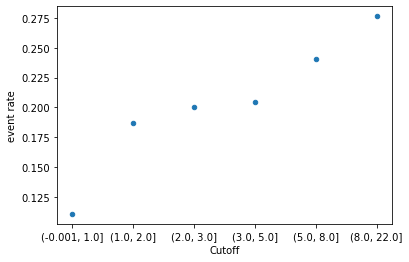

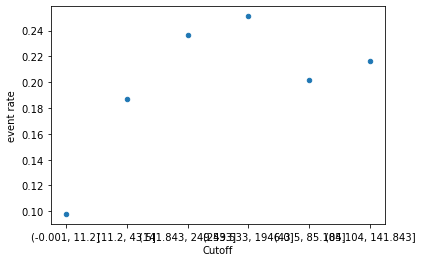

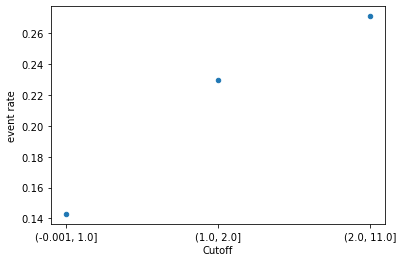

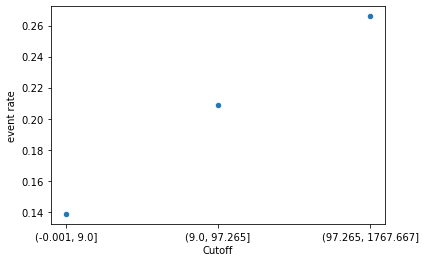

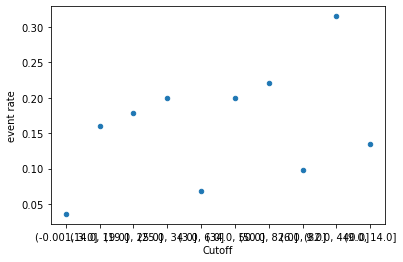

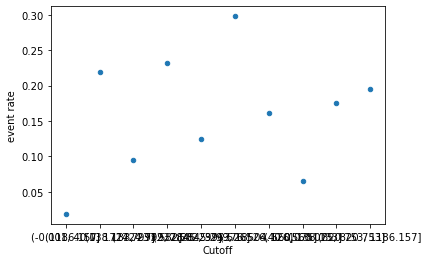

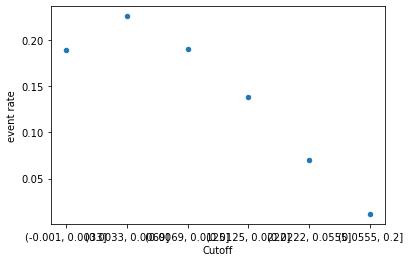

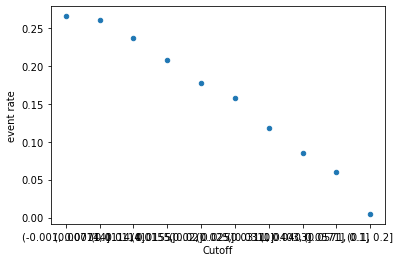

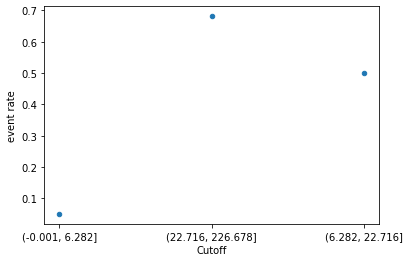

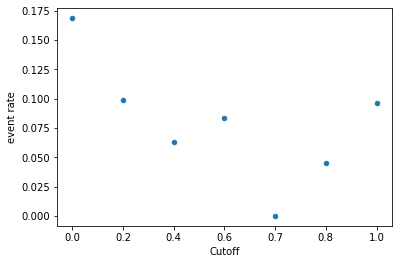

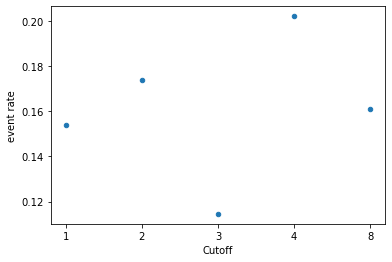

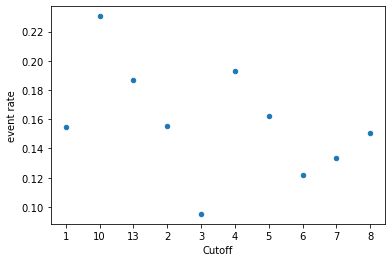

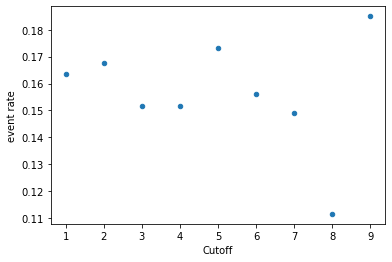

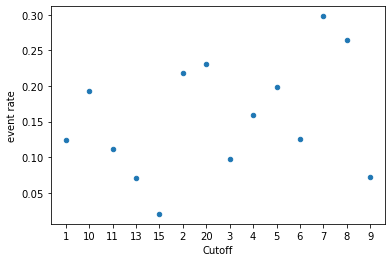

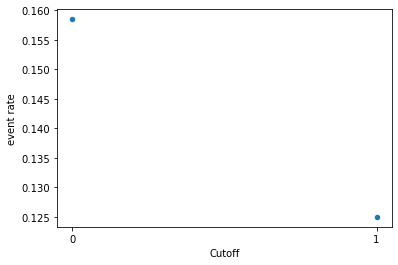

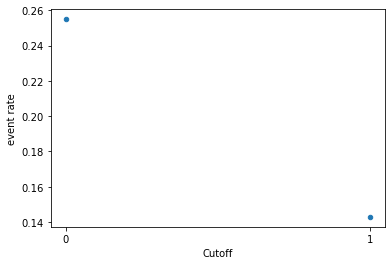

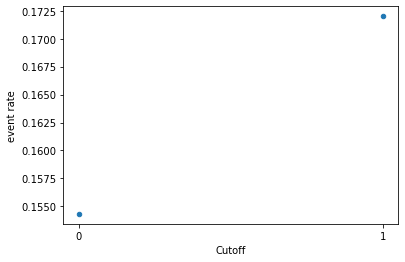

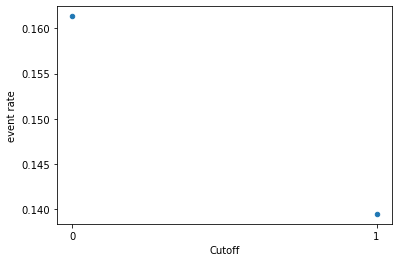

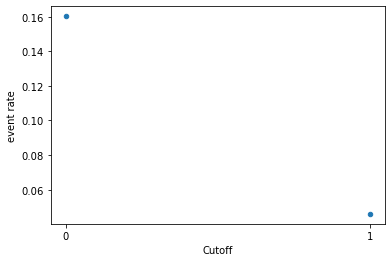

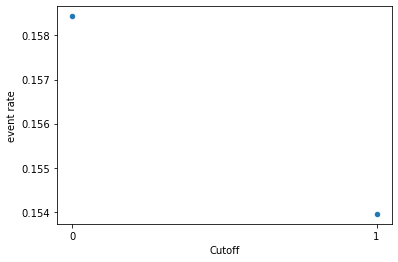

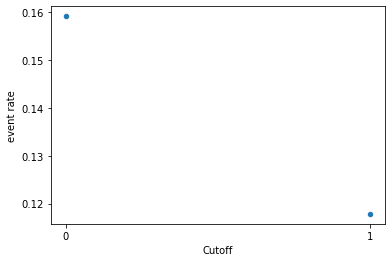

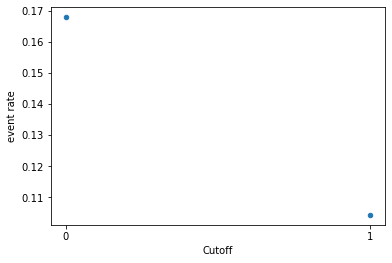

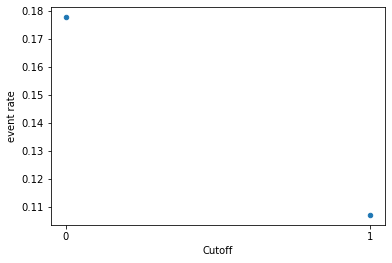

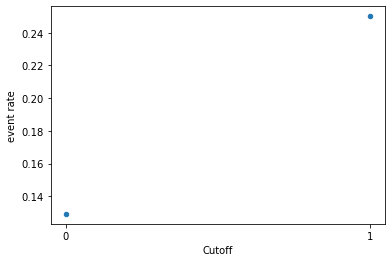

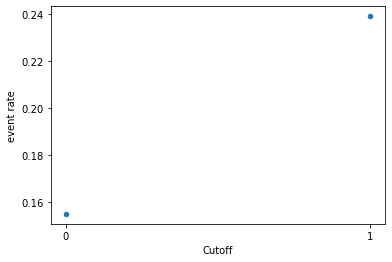

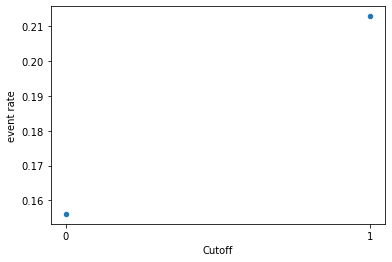

In [13]:
##Bivariate and IV after encoding 

def iv_woe(data, target, bins=10, show_woe=False):
   
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
   
    #Extract Column Names
    cols = data.columns
   
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['event rate'] = d['Events'] / d['N']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        #if show_woe == True:
        #    print(d)
        d.plot.scatter(x='Cutoff', y='event rate')
    return newDF, woeDF


iv, woe = iv_woe(data = df_v2, target = 'revenue', bins=10, show_woe = True)
print(iv)
#print(woe)
woe.to_csv(r'output_after_data.csv', index=False)

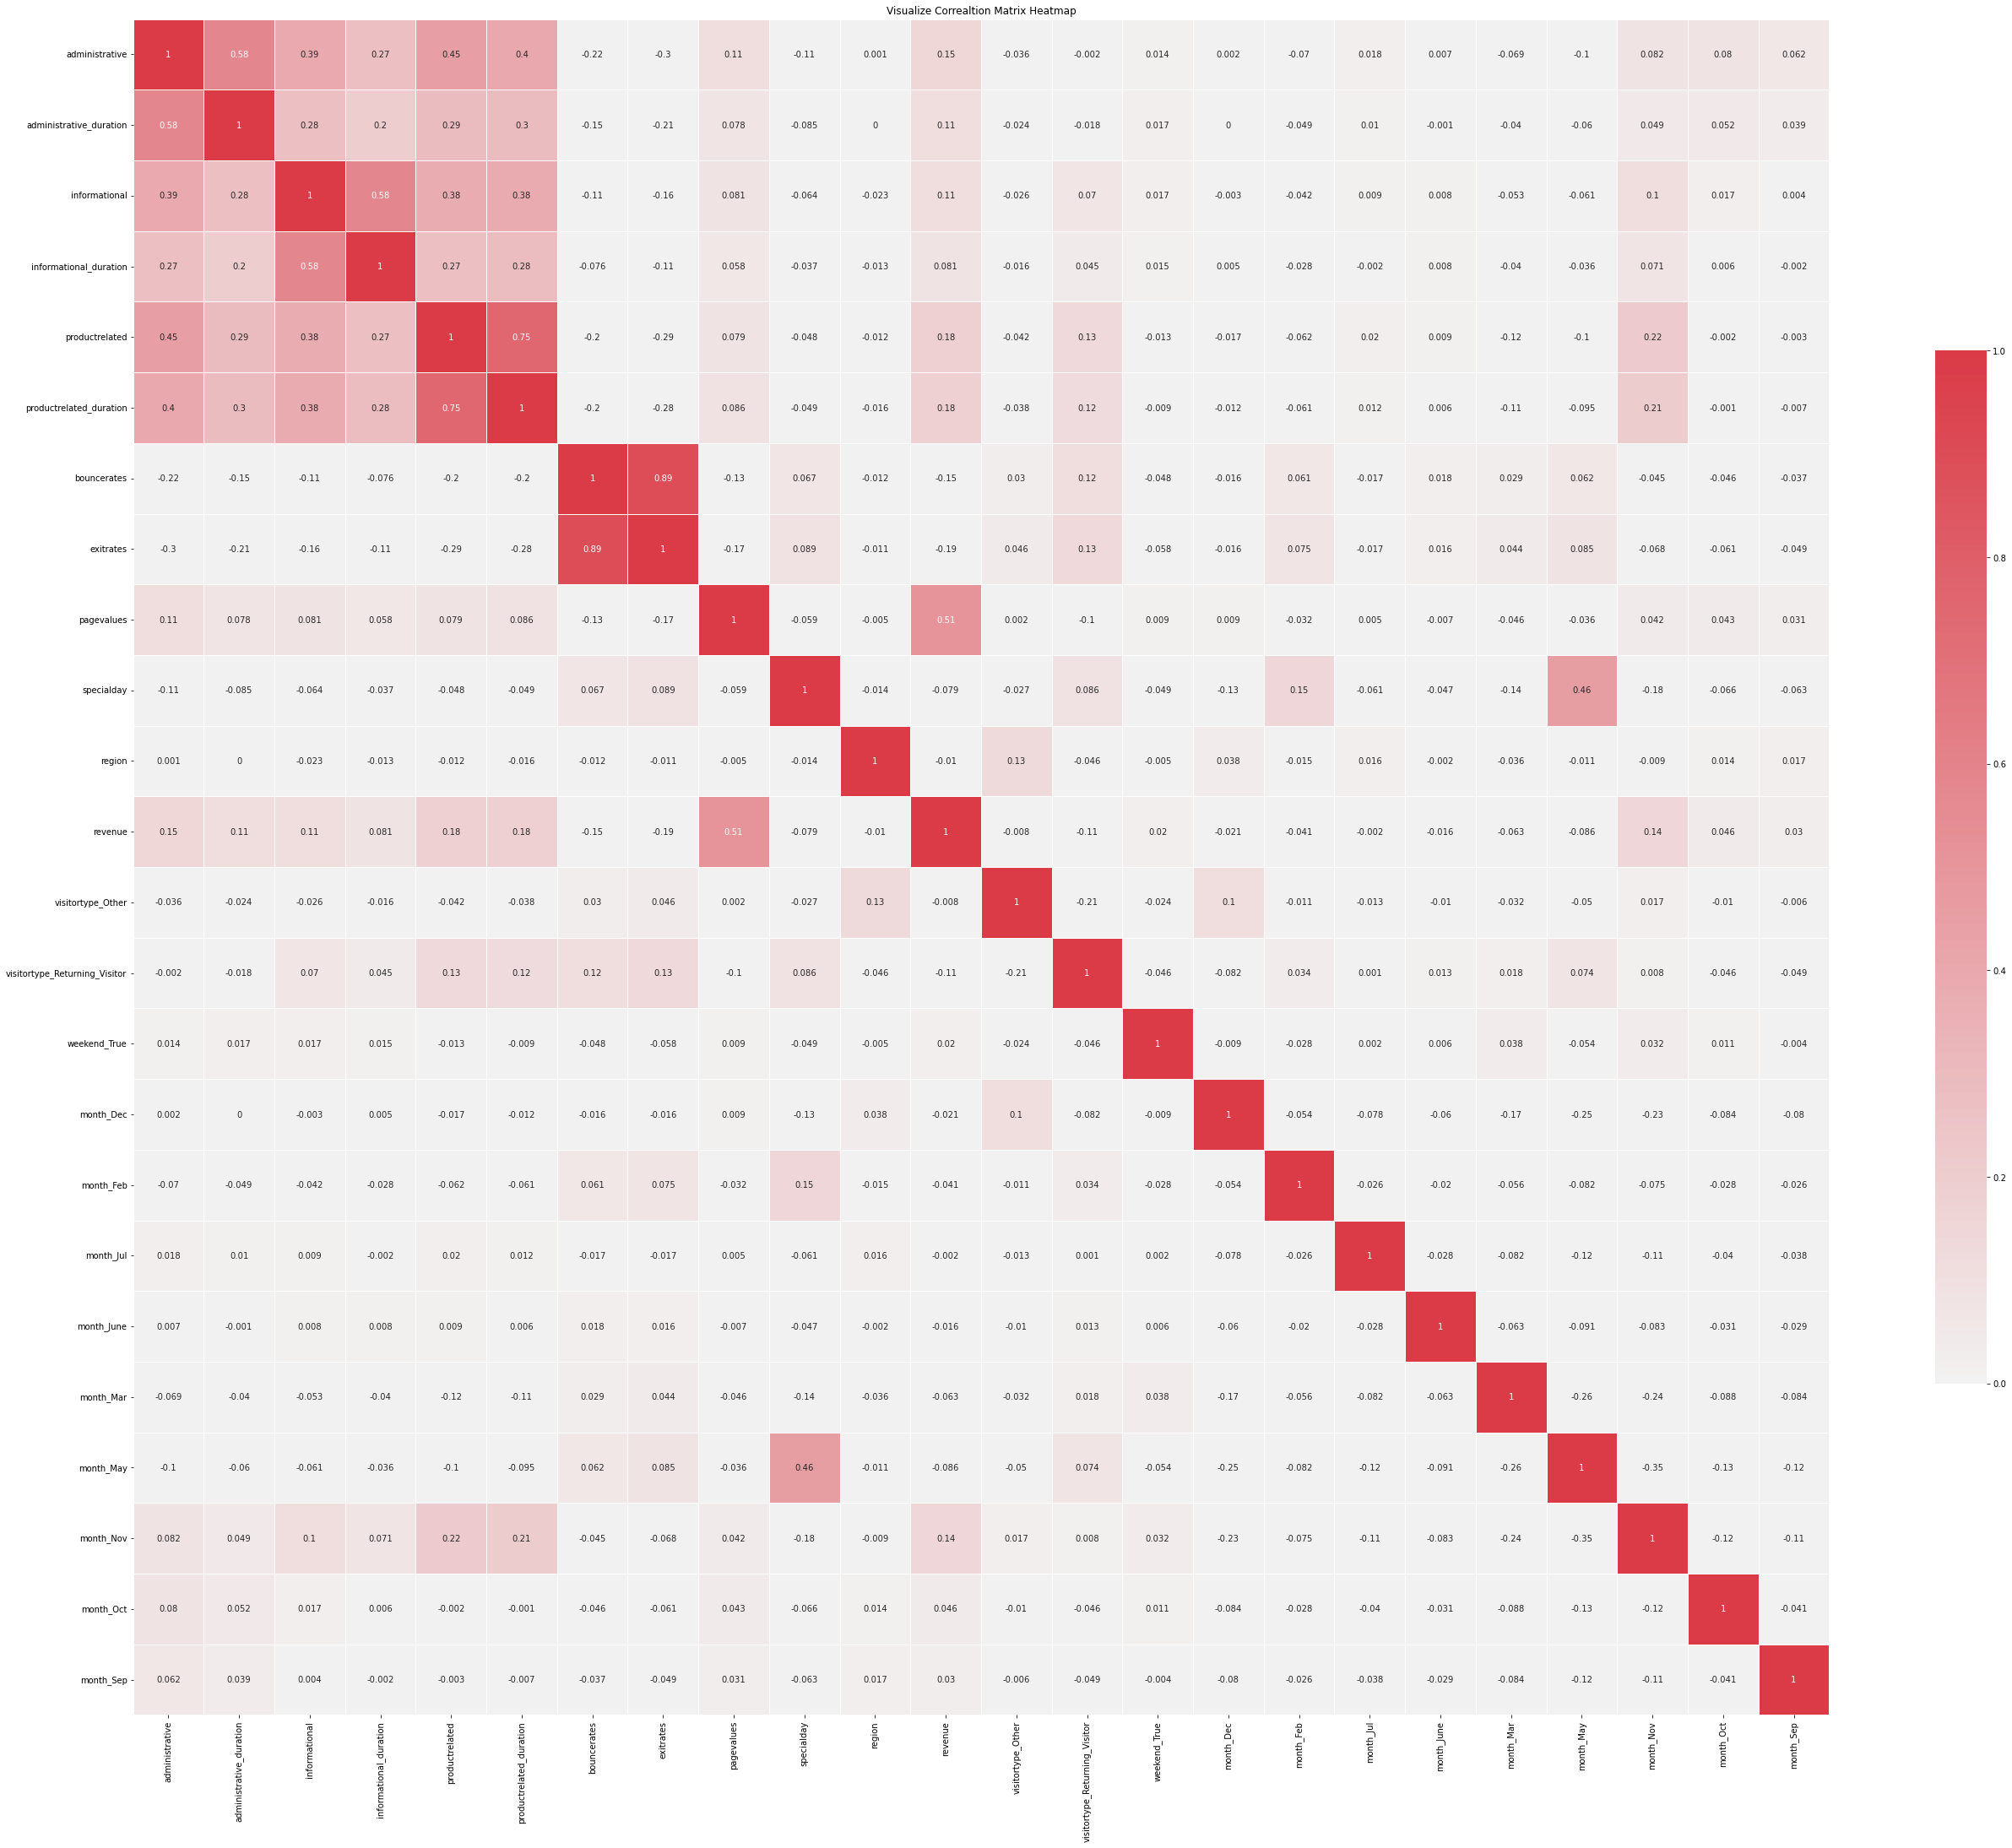

In [14]:
#HeatMap - corelation
def heatmap_corr(data,col_list):
    data.corr().style.background_gradient()
    plt.figure(figsize=(45,45))
    plt.title("Visualize Correaltion Matrix Heatmap")
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(round(data[col_list].corr(),3),vmax=1,vmin=0,center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
    
heatmap_corr(df_v2,df_v2.columns)

#### Univariate Analysis for Numeric data Columns

In [15]:
## Univariate Analysis
def univariate(dataset):
    global uni
    global num_vars
    pd.set_option('display.float_format',lambda x:'%.2f' % x)
    num_vars=dataset.select_dtypes(exclude='object')
    perc=[0.05,0.25,0.5,0.75,0.99]
    include=['float64','int64']
    uni=num_vars.describe(percentiles=perc,include=include).T
    #Missing %
    missng_count=num_vars.isnull().sum()
    percent_missing=num_vars.isnull().sum()*100/len(num_vars)
    miss=round(percent_missing,2)

    uni.insert(loc=1,column='Missing Count',value=missng_count)
    uni.insert(loc=2,column='Missing %',value=miss)
    uni=uni.astype({'count':'int'})
    print('\033[1m' + "Univariate Analysis for Numerical Variables:(below is a single table, python is displaying it in 2 parts)\n " +'\033[0m')
    print(uni.info)
    

#Calling the above function:
no_date_data=df_org[numeric_col_list]
univariate(no_date_data)

print("Median of all Numerical variables")
uni['Median']=1
for i in numeric_col_list:
    print(i,":   ",df_org[i].median())
    uni['Median'][i]=df_org[i].median()

Univariate Analysis for Numerical Variables:(below is a single table, python is displaying it in 2 parts)
 
<bound method DataFrame.info of                          count  Missing Count  Missing %    mean     std  min  \
administrative           40000              0       0.00    2.54    3.67 0.00   
administrative_duration  40000              0       0.00   89.79  182.96 0.00   
informational            40000              0       0.00    0.56    1.33 0.00   
informational_duration   40000              0       0.00   40.98  153.11 0.00   
productrelated           40000              0       0.00   34.03   46.80 0.00   
productrelated_duration  40000              0       0.00 1148.11 1666.18 0.00   
bouncerates              40000              0       0.00    0.02    0.05 0.00   
exitrates                40000              0       0.00    0.04    0.05 0.00   
pagevalues               40000              0       0.00    6.49   17.71 0.00   
specialday               40000              0     

### Preparing Data for ML Modelling

In [16]:
X=df_v2.drop("revenue",axis=1)
y=df_v2['revenue']

In [17]:
#Test-Train Data Set
Train_x = X
Train_y= y
print(Train_x.shape)

Test_x=test_v1
Test_x.shape

(40000, 26)


(10000, 26)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   administrative                 40000 non-null  int64  
 1   administrative_duration        40000 non-null  float64
 2   informational                  40000 non-null  int64  
 3   informational_duration         40000 non-null  float64
 4   productrelated                 40000 non-null  int64  
 5   productrelated_duration        40000 non-null  float64
 6   bouncerates                    40000 non-null  float64
 7   exitrates                      40000 non-null  float64
 8   pagevalues                     40000 non-null  float64
 9   specialday                     40000 non-null  float64
 10  operatingsystems               40000 non-null  object 
 11  browser                        40000 non-null  object 
 12  region                         40000 non-null 

In [19]:
Test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   administrative                 10000 non-null  int64  
 1   administrative_duration        10000 non-null  float64
 2   informational                  10000 non-null  int64  
 3   informational_duration         10000 non-null  float64
 4   productrelated                 10000 non-null  int64  
 5   productrelated_duration        10000 non-null  float64
 6   bouncerates                    10000 non-null  float64
 7   exitrates                      10000 non-null  float64
 8   pagevalues                     10000 non-null  float64
 9   specialday                     10000 non-null  float64
 10  operatingsystems               10000 non-null  object 
 11  browser                        10000 non-null  object 
 12  region                         10000 non-null  

## ML Modelling

In [20]:
## Model Analysis
def ModelResultAnalysis_TrainData(classifier,test_x,test_y):
    print("\n Classifier best parameters: \n", classifier.best_params_)
    test_y_pred = classifier.best_estimator_.predict(test_x)
    classifier_accuracy = accuracy_score(test_y, test_y_pred)
    classifier_f1score = f1_score(test_y, test_y_pred)
    fpr, tpr, thresholds = roc_curve(test_y, test_y_pred)
    auc_score = auc(fpr, tpr)
    confusion_matrix_op=confusion_matrix(test_y, test_y_pred)
    return classifier_accuracy, classifier_f1score, auc_score, confusion_matrix_op,fpr, tpr

def ReturnPredictedValue_TestData (classifier,test_x):
    classifier.best_params_
    test_y_pred = classifier.best_estimator_.predict(test_x)
    test_y_pred_df=pd.DataFrame(test_y_pred, columns = ['revenue'])
    return test_y_pred_df

### ML Modelling on Full Feature Set - 26 features

#### Random Forest Model

In [21]:
# RandomForestClassifier
parameters = {'n_estimators': list(range(5,20))}
base_model = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=base_model,
                  param_grid=parameters,
                  cv=5,
                  n_jobs=-1,
                  return_train_score=True).fit(Train_x, Train_y)

# Result Analysis
rf_accuracy, rf_f1score, rf_auc, rf_confusion_matrix, rf_fpr, rf_tpr= ModelResultAnalysis_TrainData(rf_cv,Train_x, Train_y)
print('\n Random forest Accuracy for Reduced Feature set: \n',rf_accuracy)
print('\n Random forest F1 Score for Reduced Feature set: \n', rf_f1score)
print('\n Random forest AUC for Reduced Feature set: \n', rf_auc)
print('\n Random forest Confusion Matrix for Reduced Feature set: \n',rf_confusion_matrix)

#Predicted Value from classifier
rf_predicted_df=ReturnPredictedValue_TestData (rf_cv,Test_x)
rf_final = pd.concat([test_org['session_id'], rf_predicted_df], axis=1)
rf_final.head(10)


 Classifier best parameters: 
 {'n_estimators': 19}

 Random forest Accuracy for Reduced Feature set: 
 0.9976

 Random forest F1 Score for Reduced Feature set: 
 0.99237974281632

 Random forest AUC for Reduced Feature set: 
 0.9934442755043822

 Random forest Confusion Matrix for Reduced Feature set: 
 [[33653    16]
 [   80  6251]]


,session_id,revenue
0,283149,0
1,253020,0
2,348435,0
3,299763,0
4,195120,0
5,472120,0
6,170814,0
7,465814,0
8,371639,0
9,417687,0


#### DecisionTreeClassifier Model

In [22]:
# GridSearchCV (update based on best scores range from above)

params = {
    'max_depth':list(range(2,50)),
    'criterion': ["gini", "entropy"]
}

base_model = DecisionTreeClassifier()
decision_tree_cv = GridSearchCV(estimator=base_model,
                  param_grid=params,
                  cv=5,
                  return_train_score=True).fit(Train_x,Train_y)

# Result Analysis
dt_accuracy, dt_f1score, dt_auc,dt_confusion_matrix,dt_fpr, dt_tpr= ModelResultAnalysis_TrainData(decision_tree_cv,Train_x,Train_y)
print('\n Decision Tree Accuracy for Reduced Feature set: \n',dt_accuracy)
print('\n Decision Tree F1 Score for Reduced Feature set: \n', dt_f1score)
print('\n Decision Tree AUC for Reduced Feature set: \n', dt_auc)
print('\n Decision Tree Confusion Matrix for Reduced Feature set: \n',dt_confusion_matrix)

#Predicted Value from classifier
dt_predicted_df=ReturnPredictedValue_TestData(decision_tree_cv,Test_x)
dt_final = pd.concat([test_org['session_id'], dt_predicted_df], axis=1)
dt_final.head(10)


 Classifier best parameters: 
 {'criterion': 'gini', 'max_depth': 6}

 Decision Tree Accuracy for Reduced Feature set: 
 0.9044

 Decision Tree F1 Score for Reduced Feature set: 
 0.6594835262689225

 Decision Tree AUC for Reduced Feature set: 
 0.7746887046775568

 Decision Tree Confusion Matrix for Reduced Feature set: 
 [[32473  1196]
 [ 2628  3703]]


,session_id,revenue
0,283149,0
1,253020,0
2,348435,0
3,299763,0
4,195120,0
5,472120,0
6,170814,0
7,465814,0
8,371639,0
9,417687,0


#### Logistic Regression Model

In [23]:
# GridSearchCV (update based on best scores range from above)

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

base_model = LogisticRegression()
logistic_cv = GridSearchCV(estimator=base_model,
                  param_grid=parameters,
                  cv=5,
                  return_train_score=True).fit(Train_x,Train_y)

# Result Analysis
logistic_accuracy, logistic_f1score, logistic_auc,logistic_confusion_matrix,lg_fpr, lg_tpr = ModelResultAnalysis_TrainData(logistic_cv,Train_x,Train_y)
print('\n Logistic Regression Accuracy for Reduced Feature set: \n',logistic_accuracy)
print('\n Logistic Regression F1 Score for Reduced Feature set: \n', logistic_f1score)
print('\n Logistic Regression AUC for Reduced Feature set: \n', logistic_auc)
print('\n Logistic Regression Confusion Matrix for Reduced Feature set: \n',logistic_confusion_matrix)


#Predicted Value from classifier
logistic_predicted_df=ReturnPredictedValue_TestData(logistic_cv,Test_x)
logistic_final = pd.concat([test_org['session_id'], logistic_predicted_df], axis=1)
logistic_final.head(10)



 Classifier best parameters: 
 {'solver': 'sag'}

 Logistic Regression Accuracy for Reduced Feature set: 
 0.88085

 Logistic Regression F1 Score for Reduced Feature set: 
 0.5147627774384036

 Logistic Regression AUC for Reduced Feature set: 
 0.6853515145135775

 Logistic Regression Confusion Matrix for Reduced Feature set: 
 [[32706   963]
 [ 3803  2528]]


,session_id,revenue
0,283149,0
1,253020,0
2,348435,0
3,299763,0
4,195120,0
5,472120,0
6,170814,0
7,465814,0
8,371639,0
9,417687,0


#### BernoulliNB

In [24]:
from sklearn.naive_bayes import BernoulliNB

params=[{}]
base_model = BernoulliNB()
nbg_cv=GridSearchCV(estimator=base_model,
                  param_grid=params,
                  cv=5,
                  scoring='recall',
                  return_train_score=True).fit(Train_x,Train_y)

# Result Analysis
nbg_accuracy, nbg_f1score, nbg_auc,nbg_confusion_matrix,nbg_fpr, nbg_tpr = ModelResultAnalysis_TrainData(nbg_cv,Train_x,Train_y)
print('\n BernoulliNB Accuracy for Reduced Feature set: \n',nbg_accuracy)
print('\n BernoulliNB F1 Score for Reduced Feature set: \n', nbg_f1score)
print('\n BernoulliNB AUC for Reduced Feature set: \n', nbg_auc)
print('\n BernoulliNB Confusion Matrix for Reduced Feature set: \n',nbg_confusion_matrix)

#Predicted Value from classifier
nbg_predicted_df=ReturnPredictedValue_TestData(nbg_cv,Test_x)
nbg_final = pd.concat([test_org['session_id'], nbg_predicted_df], axis=1)
nbg_final.head(10)


 Classifier best parameters: 
 {}

 BernoulliNB Accuracy for Reduced Feature set: 
 0.8519

 BernoulliNB F1 Score for Reduced Feature set: 
 0.572027163704667

 BernoulliNB AUC for Reduced Feature set: 
 0.7599190055993983

 BernoulliNB Confusion Matrix for Reduced Feature set: 
 [[30117  3552]
 [ 2372  3959]]


,session_id,revenue
0,283149,0
1,253020,0
2,348435,0
3,299763,0
4,195120,0
5,472120,0
6,170814,0
7,465814,0
8,371639,0
9,417687,0


#### ML Modeling Selected Reduced 14 Feature List using Information Value

In [25]:
selected_features=['pagevalues',
'exitrates',
'productrelated_duration',
'administrative_duration',
'traffictype',
'administrative',
'month_Nov',
'informational_duration',
'specialday',
'informational',
'visitortype_Returning_Visitor',
'month_May',
'operatingsystems',
'month_Mar']

In [26]:
df_v3=X.copy()

In [27]:
df_v3=df_v3.loc[:, df_v3.columns.isin(selected_features)]


In [28]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   administrative                 40000 non-null  int64  
 1   administrative_duration        40000 non-null  float64
 2   informational                  40000 non-null  int64  
 3   informational_duration         40000 non-null  float64
 4   productrelated_duration        40000 non-null  float64
 5   exitrates                      40000 non-null  float64
 6   pagevalues                     40000 non-null  float64
 7   specialday                     40000 non-null  float64
 8   operatingsystems               40000 non-null  object 
 9   traffictype                    40000 non-null  object 
 10  visitortype_Returning_Visitor  40000 non-null  uint8  
 11  month_Mar                      40000 non-null  uint8  
 12  month_May                      40000 non-null 

In [30]:
x_train=df_v3
x_test=test_v1.loc[:, test_v1.columns.isin(selected_features)]
#x_test=test_v1

### RandomForestClassifier for 14 features

In [31]:
# RandomForestClassifier
parameters = {'n_estimators': list(range(5,20))}
base_model = RandomForestClassifier()
rf1_cv = GridSearchCV(estimator=base_model,
                  param_grid=parameters,
                  cv=5,
                  n_jobs=-1,
                  return_train_score=True).fit(x_train, Train_y)

# Result Analysis
rf1_accuracy, rf1_f1score, rf1_auc, rf1_confusion_matrix, rf1_fpr, rf1_tpr= ModelResultAnalysis_TrainData(rf1_cv,x_train, Train_y)
print('\n Random forest Accuracy for Reduced Feature set: \n',rf1_accuracy)
print('\n Random forest F1 Score for Reduced Feature set: \n', rf1_f1score)
print('\n Random forest AUC for Reduced Feature set: \n', rf1_auc)
print('\n Random forest Confusion Matrix for Reduced Feature set: \n',rf1_confusion_matrix)

#Predicted Value from classifier
rf1_predicted_df=ReturnPredictedValue_TestData (rf1_cv,x_test)
rf1_final = pd.concat([test_org['session_id'], rf1_predicted_df], axis=1)
rf1_final.head(10)


 Classifier best parameters: 
 {'n_estimators': 17}

 Random forest Accuracy for Reduced Feature set: 
 0.997375

 Random forest F1 Score for Reduced Feature set: 
 0.9916739354531758

 Random forest AUC for Reduced Feature set: 
 0.99343887341941

 Random forest Confusion Matrix for Reduced Feature set: 
 [[33642    27]
 [   78  6253]]


,session_id,revenue
0,283149,0
1,253020,0
2,348435,0
3,299763,0
4,195120,0
5,472120,0
6,170814,0
7,465814,0
8,371639,0
9,417687,0


In [ ]:
dt_final.to_csv('submission_final_latest.csv',index = False)

### Decision Tree for 14 Features

In [33]:
# GridSearchCV (update based on best scores range from above)

params = {
    'max_depth':list(range(2,60)),
    'criterion': ["gini", "entropy"]
}

base_model = DecisionTreeClassifier(random_state=1024)
decision_tree_cv1 = GridSearchCV(estimator=base_model,
                  param_grid=params,
                  cv=5,
                  return_train_score=True).fit(x_train,Train_y)

# Result Analysis
dt1_accuracy, dt1_f1score, dt1_auc,dt1_confusion_matrix,dt1_fpr, dt1_tpr= ModelResultAnalysis_TrainData(decision_tree_cv1,x_train,Train_y)
print('\n Decision Tree Accuracy for Reduced Feature set: \n',dt1_accuracy)
print('\n Decision Tree F1 Score for Reduced Feature set: \n', dt1_f1score)
print('\n Decision Tree AUC for Reduced Feature set: \n', dt1_auc)
print('\n Decision Tree Confusion Matrix for Reduced Feature set: \n',dt1_confusion_matrix)

#Predicted Value from classifier
dt1_predicted_df=ReturnPredictedValue_TestData(decision_tree_cv1,x_test)
dt1_final = pd.concat([test_org['session_id'], dt1_predicted_df], axis=1)
dt1_final.head(10)


 Classifier best parameters: 
 {'criterion': 'entropy', 'max_depth': 8}

 Decision Tree Accuracy for Reduced Feature set: 
 0.90595

 Decision Tree F1 Score for Reduced Feature set: 
 0.6858192750960415

 Decision Tree AUC for Reduced Feature set: 
 0.8014522146129996

 Decision Tree Confusion Matrix for Reduced Feature set: 
 [[32132  1537]
 [ 2225  4106]]


,session_id,revenue
0,283149,0
1,253020,0
2,348435,0
3,299763,0
4,195120,0
5,472120,0
6,170814,0
7,465814,0
8,371639,0
9,417687,0


### Logistic Regression on 14 Features

In [35]:
# GridSearchCV (update based on best scores range from above)

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

base_model = LogisticRegression()
logistic1_cv1 = GridSearchCV(estimator=base_model,
                  param_grid=parameters,
                  cv=5,
                  return_train_score=True).fit(x_train,Train_y)

# Result Analysis
logistic1_accuracy, logistic1_f1score, logistic1_auc,logistic1_confusion_matrix,lg1_fpr, lg1_tpr = ModelResultAnalysis_TrainData(logistic1_cv1,x_train,Train_y)
print('\n Logistic Regression Accuracy for Reduced Feature set: \n',logistic1_accuracy)
print('\n Logistic Regression F1 Score for Reduced Feature set: \n', logistic1_f1score)
print('\n Logistic Regression AUC for Reduced Feature set: \n', logistic1_auc)
print('\n Logistic Regression Confusion Matrix for Reduced Feature set: \n',logistic1_confusion_matrix)


#Predicted Value from classifier
logistic1_predicted_df=ReturnPredictedValue_TestData(logistic1_cv1,x_test)
logistic1_final = pd.concat([test_org['session_id'], logistic1_predicted_df], axis=1)
logistic1_final.head(10)


 Classifier best parameters: 
 {'solver': 'sag'}

 Logistic Regression Accuracy for Reduced Feature set: 
 0.8823

 Logistic Regression F1 Score for Reduced Feature set: 
 0.5325655281969818

 Logistic Regression AUC for Reduced Feature set: 
 0.6960882463583813

 Logistic Regression Confusion Matrix for Reduced Feature set: 
 [[32610  1059]
 [ 3649  2682]]


,session_id,revenue
0,283149,0
1,253020,0
2,348435,0
3,299763,0
4,195120,0
5,472120,0
6,170814,0
7,465814,0
8,371639,0
9,417687,0


#### BernoulliNB

In [39]:
from sklearn.naive_bayes import BernoulliNB

params=[{}]
base_model = BernoulliNB()
nbg1_cv1=GridSearchCV(estimator=base_model,
                  param_grid=params,
                  cv=5,
                  scoring='recall',
                  return_train_score=True).fit(x_train,Train_y)

# Result Analysis
nbg1_accuracy, nbg1_f1score, nbg1_auc,nbg1_confusion_matrix,nbg1_fpr, nbg1_tpr = ModelResultAnalysis_TrainData(nbg1_cv1,x_train,Train_y)
print('\n BernoulliNB Accuracy for Reduced Feature set: \n',nbg1_accuracy)
print('\n BernoulliNB F1 Score for Reduced Feature set: \n', nbg1_f1score)
print('\n BernoulliNB AUC for Reduced Feature set: \n', nbg1_auc)
print('\n BernoulliNB Confusion Matrix for Reduced Feature set: \n',nbg1_confusion_matrix)

#Predicted Value from classifier
nbg1_predicted_df=ReturnPredictedValue_TestData(nbg1_cv1,x_test)
nbg1_final = pd.concat([test_org['session_id'], nbg1_predicted_df], axis=1)
nbg1_final.head(10)


 Classifier best parameters: 
 {}

 BernoulliNB Accuracy for Reduced Feature set: 
 0.84895

 BernoulliNB F1 Score for Reduced Feature set: 
 0.5742671927846673

 BernoulliNB AUC for Reduced Feature set: 
 0.7656052688582505

 BernoulliNB Confusion Matrix for Reduced Feature set: 
 [[29883  3786]
 [ 2256  4075]]


,session_id,revenue
0,283149,0
1,253020,0
2,348435,0
3,299763,0
4,195120,0
5,472120,0
6,170814,0
7,465814,0
8,371639,0
9,417687,0


### Performance Analysis (Train Data - CV) with Decision Tree ,Random Forest ,NaiveBayes Bernoulli,Logistic Regression,SVM and KNN on full feature Set - 26 features

            model_name  Accuracy  F1 Score  AUC Value
0        Decision Tree      0.90      0.66       0.77
1        Random Forest      1.00      0.99       0.99
2          BernoulliNB      0.85      0.57       0.76
3  Logistic Regression      0.88      0.51       0.69


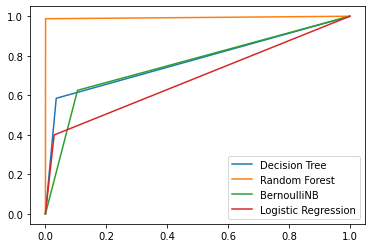

In [40]:
# Creating the datafranme with performance metrics 

df_result = pd.DataFrame({
    'model_name': ['Decision Tree', 'Random Forest', 'BernoulliNB', 'Logistic Regression'],
    'Accuracy':[dt_accuracy, rf_accuracy, nbg_accuracy, logistic_accuracy],
    'F1 Score': [dt_f1score, rf_f1score, nbg_f1score,  logistic_f1score],
    'AUC Value': [dt_auc, rf_auc, nbg_auc, logistic_auc]
})
print(df_result)


# Plotting the combined results

plt.plot(dt_fpr, dt_tpr)
plt.plot(rf_fpr, rf_tpr)
plt.plot(nbg_fpr, nbg_tpr)
plt.plot(lg_fpr, lg_tpr)
plt.legend(['Decision Tree', 'Random Forest', 'BernoulliNB', 'Logistic Regression'])


### Performance Analysis (Train Data - CV) with Decision Tree ,Random Forest ,NaiveBayes Bernoulli,Logistic Regression,SVM and KNN on full feature Set - 14 features


            model_name  Accuracy  F1 Score  AUC Value
0        Decision Tree      0.91      0.69       0.80
1        Random Forest      1.00      0.99       0.99
2          BernoulliNB      0.85      0.57       0.77
3  Logistic Regression      0.88      0.53       0.70


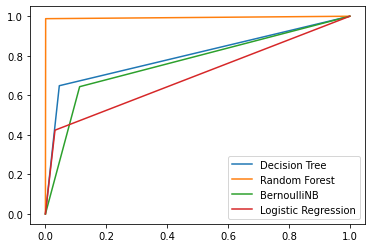

In [41]:
# Creating the datafranme with performance metrics 

df1_result = pd.DataFrame({
    'model_name': ['Decision Tree', 'Random Forest', 'BernoulliNB', 'Logistic Regression'],
    'Accuracy':[dt1_accuracy, rf1_accuracy, nbg1_accuracy, logistic1_accuracy],
    'F1 Score': [dt1_f1score, rf1_f1score, nbg1_f1score,  logistic1_f1score],
    'AUC Value': [dt1_auc, rf1_auc, nbg1_auc, logistic1_auc]
})
print(df1_result)


# Plotting the combined results

plt.plot(dt1_fpr, dt1_tpr)
plt.plot(rf1_fpr, rf1_tpr)
plt.plot(nbg1_fpr, nbg1_tpr)
plt.plot(lg1_fpr, lg1_tpr)
plt.legend(['Decision Tree', 'Random Forest', 'BernoulliNB', 'Logistic Regression'])


#### Observation:
All variables vs selected variables: All the models are derived using both;
reduced list of variables and full list of variables. And as expected there is no big
difference found in terms of model performance.

### Conclusion

EDA conclusion :
Visitor Type: It is clear that new visitors are the highest revenue generator. Hence
organization should focus on to bring new visitors to the site.

Product Pages: Need to focus on product specific pages along with other pages to
improve the same with customer requirements so that customer can be hold or
longer time as it increase the revenue rate.

Exit Rate: Exit Rate needs to be reduced as high exit rates refers less revenue

Special Day: organization needs to work on delivery time (value should be close
to 0) to ensure high revenue during special day.

Model Conclusion:
Decision Tree was the best fit model for given train  data set with following parameters
F1 score  :  0.68
Accuracy : 0.905
AUC  : 0.80
Note: Even though Random forest classifier is better scores but suffers from overfitting issue

In [42]:
#Final output to CSV 
dt1_final.to_csv('submission_final_latest_hck2.csv',index = False)